In [1]:
import matplotlib.cm as cm
import networkx as nx
import numpy as np
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.10'

In [4]:
speeds = pd.read_csv('movement-speeds-quarterly-by-hod-san-francisco-2019-Q2.csv.zip')

In [6]:
speeds

,year,quarter,hour_of_day,segment_id,start_junction_id,end_junction_id,speed_mph_mean,speed_mph_stddev,speed_mph_p50,speed_mph_p85
0,2019,2,16,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,27.540,3.553,27.102,31.084
1,2019,2,21,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,28.044,4.099,27.982,32.231
2,2019,2,9,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,28.345,3.709,28.280,31.994
3,2019,2,15,f760abfc62a68da92286dd403a9e94df30e58eeb,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,73659050e57d4848d2e056d7dfa32fa68b1432c8,27.489,3.338,27.369,30.693
4,2019,2,8,f760abfc62a68da92286dd403a9e94df30e58eeb,73659050e57d4848d2e056d7dfa32fa68b1432c8,9c7c7bc9cef41a2b40e8bacb906bb5d94021f4a7,24.338,9.440,26.468,34.234
...,...,...,...,...,...,...,...,...,...,...
5474123,2019,2,10,49946741e5cf5fad08fcb8b1e80c83b00c5af714,8f7d70db5ef6c8dc6d11ca7bb85dccc92f633658,b588045bf2949b4219625511e65fcc065099ba4f,22.380,2.797,21.930,25.839
5474124,2019,2,14,49946741e5cf5fad08fcb8b1e80c83b00c5af714,b588045bf2949b4219625511e65fcc065099ba4f,8f7d70db5ef6c8dc6d11ca7bb85dccc92f633658,15.443,3.676,14.821,19.548
5474125,2019,2,8,49946741e5cf5fad08fcb8b1e80c83b00c5af714,8f7d70db5ef6c8dc6d11ca7bb85dccc92f633658,b588045bf2949b4219625511e65fcc065099ba4f,21.075,3.021,21.175,24.582
5474126,2019,2,13,49946741e5cf5fad08fcb8b1e80c83b00c5af714,b588045bf2949b4219625511e65fcc065099ba4f,8f7d70db5ef6c8dc6d11ca7bb85dccc92f633658,16.160,3.121,16.339,17.923


In [27]:
osm_nodes = pd.read_csv('movement-junctions-to-osm-nodes-san-francisco-2019.csv.zip')

In [8]:
osm_nodes

,junction_id,osm_node_id
0,d003d2aaaaf67abcd3731a1f67e23022490214c8,53032423
1,7eb8208f6ef1b2796509437254a0de736540597d,53072783
2,ed3fbd7093ea705a7b2516a7ed0b84e5edad7273,4912980927
3,f9efd88b18b1fe6378ea07283832b409dc3356d0,4915659718
4,dd9d97e1518716ace9ab9e9fc8d53599b6400fb9,4923982554
...,...,...
688978,273b4da86a9cf30b9ed97efe759784e536e548e3,62509504
688979,f51437760e068bc9bec5e93c5b9723eac98e34fe,86022506
688980,b836d3e67cc8abe21aa537fa8cc9f4e2745cf057,1703242283
688981,926e9e545587f3ac47826eddd89f354f467be837,1900656221


In [9]:
osm_ways = pd.read_csv('movement-segments-to-osm-ways-san-francisco-2019.csv.zip')

In [10]:
osm_ways

,segment_id,osm_way_id
0,55c0708ff7f07745d3c55c35b671d14d130c6c9f,6384360
1,ddf1e8313d5e386c4056461be4a28f1278a2ec1c,7722701
2,080638a6ff9fd5c3885f5ec681901a30150d2141,7854810
3,31752678671b0acb833d59f4f57770bfc687ca39,8919748
4,a83e7ca5d85ea428d1d6fe7319606a27a0bcdd88,8923939
...,...,...
878229,63bc172a7caaebe3dedb0b555e53090173623ba7,183248311
878230,4e0af158f905ed79a3a821c9ed904c3e9b5ceb06,440517423
878231,494166461bef5fd4dc9ca108138e52e7a76ddab1,500240741
878232,180627769c9547292d3a308ec9b82720e71432d1,501836976


In [3]:
graph = ox.graph_from_place('San Francisco, California, USA')

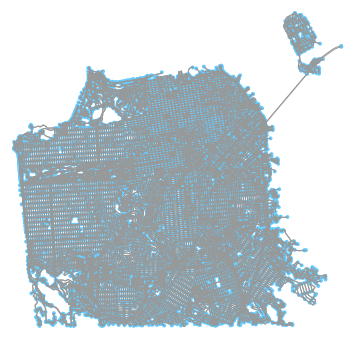

(<Figure size 570.954x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f246b849198>)

In [17]:
ox.plot_graph(graph)

In [58]:
# Filter Uber Movement data for points within SF
# It also contains other parts of the bay area
osm_nodes = osm_nodes[osm_nodes['osm_node_id'].isin(graph.nodes)]
way_ids = {}
for vertex_pair in graph.edges:
    edge = graph.edges[vertex_pair]
    osmid = edge['osmid']
    if isinstance(osmid, list):
        for o in osmid:
            way_ids[o] = edge
    else:
        way_ids[osmid] = edge
osm_ways = osm_ways[osm_ways['osm_way_id'].isin(way_ids)]

In [68]:
# Map ways to OSM data
def get_field(edge, field_name):
    return edge[field_name] if field_name in edge else None
osm_ways['name'] = osm_ways['osm_way_id'].map(
    lambda way_id: get_field(way_ids[way_id], 'name'))
osm_ways['highway'] = osm_ways['osm_way_id'].map(
    lambda way_id: get_field(way_ids[way_id], 'highway'))
osm_ways['maxspeed'] = osm_ways['osm_way_id'].map(
    lambda way_id: get_field(way_ids[way_id], 'maxspeed'))
osm_ways['length'] = osm_ways['osm_way_id'].map(
    lambda way_id: get_field(way_ids[way_id], 'length'))

In [60]:
osm_nodes

,junction_id,osm_node_id
9,b8e1a0a4bec282798bb5937dcaca5aa7ccd847a9,258886228
47,fafe8f87314bd81affaad6017d27a54f30265f2c,5424774889
142,454b7245b658e5918cd8f37db0babe32d11f2136,5443323638
221,e63d58507968350d9bcc8545f8c58f6285eeb31b,65285017
229,c671cf88348404afec9b2f6f942577056a719439,5440265279
...,...,...
688686,305a076550b945bb855e78d2490f78191deae2e0,65293212
688785,ecc606843fbd321b247a0d26dea10e4cd751ded0,65289489
688786,db205d9e58579d7ce6be1c3aa42fba0a876d7666,65302192
688811,522eb949ba120a3c37960b8de62b9f7c232c7a53,315432628


In [69]:
osm_ways

,segment_id,osm_way_id,maxspeed,name,highway,length
3,31752678671b0acb833d59f4f57770bfc687ca39,8919748,None,Italy Avenue,residential,75.861
8,f702ce0e8b061ba06f467dfa59f0b1268a45d778,565079465,None,None,service,45.913
49,312622616e30d74644945073f0e2991201c68b94,8919176,None,Montezuma Street,residential,214.665
86,4f99e07f922abbea743dfa01ed9b68e989fd7a23,52721873,10 mph,4th Street,residential,32.191
92,86962359f49152612b8de85ad3a41c8d967b6916,503951429,None,None,service,50.191
...,...,...,...,...,...,...
878079,c55467c0ddf7f2f8844422324cf273d5f8ff5dc0,147397959,None,20th Avenue,residential,32.531
878132,b0b57e855ef2fb0a7bf291b4cd1b91d1d984bc9f,678522938,None,Judah Street,tertiary,73.519
878166,0060360f72685c709025147952a6ca1f51566f9e,56029759,None,None,service,426.758
878169,62a0bdf9856e55e0c97eab731de11e6a2fa2f812,254759914,30 mph,Bush Street,secondary,86.703
